In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:

from transformers import pipeline

pipe = pipeline("text-generation", model="meta-llama/Llama-2-7b-hf")

Loading checkpoint shards: 100%|██████████| 2/2 [00:37<00:00, 18.51s/it]


In [30]:
pipe("I can't believe you did such a ", do_sample=False, max_new_tokens=100)

[{'generated_text': "I can't believe you did such a 180 on me. I thought you were a good guy. I thought you were a good friend. I thought you were a good man. I thought you were a good father. I thought you were a good husband. I thought you were a good brother. I thought you were a good son. I thought you were a good friend. I thought you were a good neighbor. I thought you were a good person. I thought you were a good man. I thought you were a"}]

In [31]:
oracle = pipeline(model="facebook/bart-large-mnli")

In [32]:
oracle(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036359429359436,
  0.4787989854812622,
  0.012600550428032875,
  0.002655780641362071,
  0.002308762166649103]}

In [3]:
# import csv file
df = pd.read_csv('commentary_bractwo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2708 non-null   int64  
 1   post_author            2708 non-null   int64  
 2   post_date              2708 non-null   object 
 3   post_date_gmt          2708 non-null   object 
 4   post_content           1733 non-null   object 
 5   post_title             2676 non-null   object 
 6   post_excerpt           143 non-null    object 
 7   post_status            2708 non-null   object 
 8   comment_status         2681 non-null   object 
 9   ping_status            2707 non-null   object 
 10  post_password          0 non-null      float64
 11  post_name              2705 non-null   object 
 12  to_ping                0 non-null      float64
 13  pinged                 0 non-null      float64
 14  post_modified          2708 non-null   object 
 15  post

In [4]:
df = df.dropna(axis=1, how='all')
df = df.drop(['ping_status','post_modified','post_modified_gmt','post_date_gmt','comment_status', 'comment_count'], axis=1)
df.head()


,ID,post_author,post_date,post_content,post_title,post_excerpt,post_status,post_name,post_parent,guid,menu_order,post_type,post_mime_type
0,28,7,2012-12-03 13:43:28,"Chrześcijaństwo to religia, która nie opiera s...",NaN,Laboratorium Słowa Bożego stawia sobie za cel ...,publish,laboratorium-slowa-bozego,0,http://bractwoslowa.pl/?p=28,0,post,NaN
1,214,7,2013-02-15 02:03:28,"Chwalić Cię będę, Panie, całym sercem moim,\n\...",NaN,Księga Psalmów to życie człowieka. Psalm 1 jes...,publish,rozwazania-do-ksiegi-psalmow-3,0,http://bractwoslowa.pl/?p=214,0,post,NaN
2,362,7,2013-10-14 22:17:46,<strong>1. Laboratorium Słowa Bożego (LSB)</st...,Co ustalono na posiedzeniu Zarządu,"Warszawa, 11 października 2013 r.",publish,co-ustalono-na-posiedzeniu-zarzadu-11-10-2013r,0,http://bractwoslowa.pl/?p=362,0,post,NaN
3,383,7,2013-10-15 06:18:13,"Chwalić Cię będę, Panie, całym sercem moim,\n\...",NaN,Księga Psalmów to życie człowieka. Psalm 1 jes...,publish,psalm-21,0,http://bractwoslowa.pl/?p=383,0,post,NaN
4,455,7,2013-10-25 07:16:07,"&nbsp;\n\nChrześcijaństwo to religia, która ni...",NaN,Laboratorium Słowa Bożego stawia sobie za cel ...,publish,laboratorium-slowa-bozego-2,0,http://bractwoslowa.pl/?p=455,0,post,NaN


In [5]:
df = df[df['post_content'].notnull()]
df.head()

,ID,post_author,post_date,post_content,post_title,post_excerpt,post_status,post_name,post_parent,guid,menu_order,post_type,post_mime_type
0,28,7,2012-12-03 13:43:28,"Chrześcijaństwo to religia, która nie opiera s...",NaN,Laboratorium Słowa Bożego stawia sobie za cel ...,publish,laboratorium-slowa-bozego,0,http://bractwoslowa.pl/?p=28,0,post,NaN
1,214,7,2013-02-15 02:03:28,"Chwalić Cię będę, Panie, całym sercem moim,\n\...",NaN,Księga Psalmów to życie człowieka. Psalm 1 jes...,publish,rozwazania-do-ksiegi-psalmow-3,0,http://bractwoslowa.pl/?p=214,0,post,NaN
2,362,7,2013-10-14 22:17:46,<strong>1. Laboratorium Słowa Bożego (LSB)</st...,Co ustalono na posiedzeniu Zarządu,"Warszawa, 11 października 2013 r.",publish,co-ustalono-na-posiedzeniu-zarzadu-11-10-2013r,0,http://bractwoslowa.pl/?p=362,0,post,NaN
3,383,7,2013-10-15 06:18:13,"Chwalić Cię będę, Panie, całym sercem moim,\n\...",NaN,Księga Psalmów to życie człowieka. Psalm 1 jes...,publish,psalm-21,0,http://bractwoslowa.pl/?p=383,0,post,NaN
4,455,7,2013-10-25 07:16:07,"&nbsp;\n\nChrześcijaństwo to religia, która ni...",NaN,Laboratorium Słowa Bożego stawia sobie za cel ...,publish,laboratorium-slowa-bozego-2,0,http://bractwoslowa.pl/?p=455,0,post,NaN


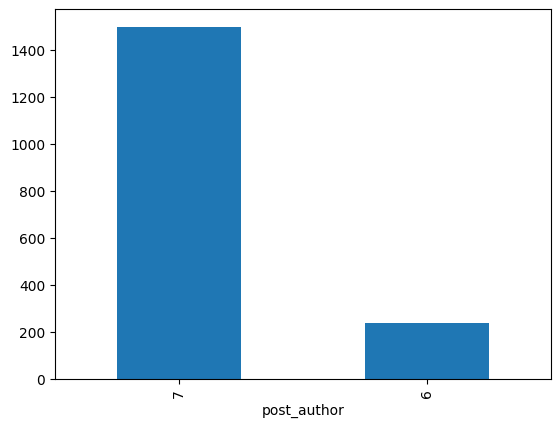

In [6]:
df['post_author'].value_counts().plot(kind='bar')
df = df.drop(['post_author'], axis=1)


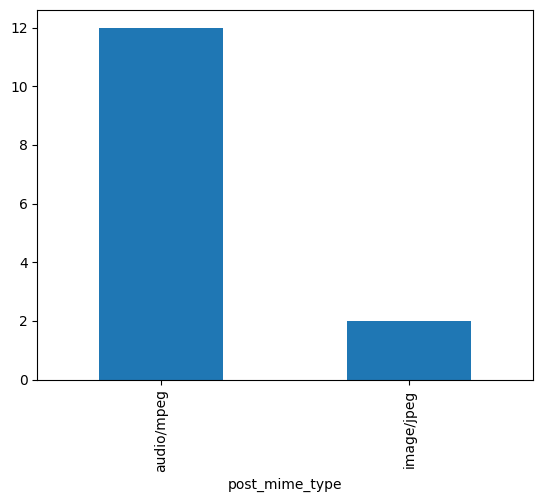

In [7]:
df['post_mime_type'].value_counts().plot(kind='bar')

df = df[df['post_mime_type'] != "image/jpeg"]
df = df[df['post_mime_type'] != "audio/mpeg"]

<Axes: >

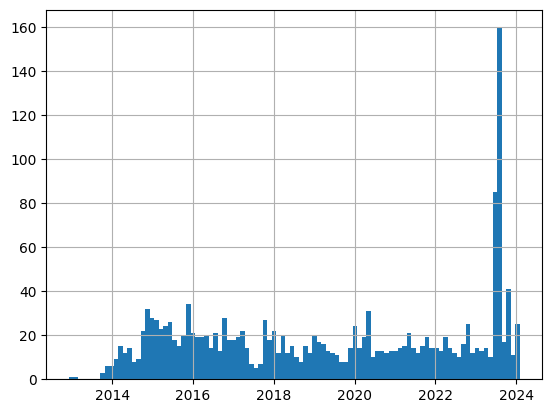

In [8]:
# show post_date timeline visualization
df['post_date_datetime'] = pd.to_datetime(df['post_date'])
df['post_date_datetime'].hist(bins=100)

,ID,post_date,post_content,post_title,post_excerpt,post_status,post_name,post_parent,guid,menu_order,post_type,post_mime_type,post_date_datetime


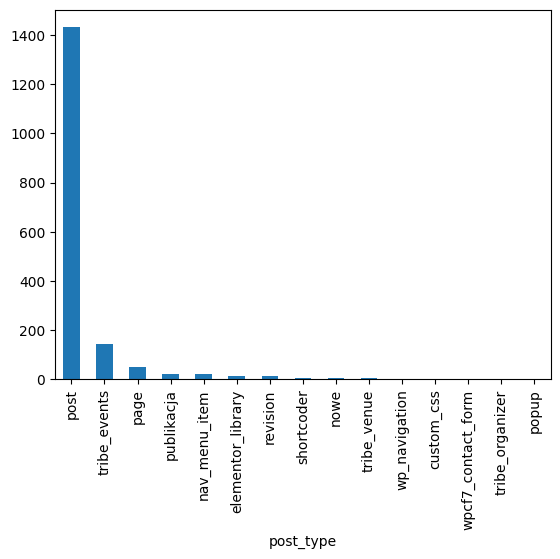

In [9]:
df['post_type'].value_counts().plot(kind='bar')
df[df['post_type'] == 'attachment']

<Axes: xlabel='post_status'>

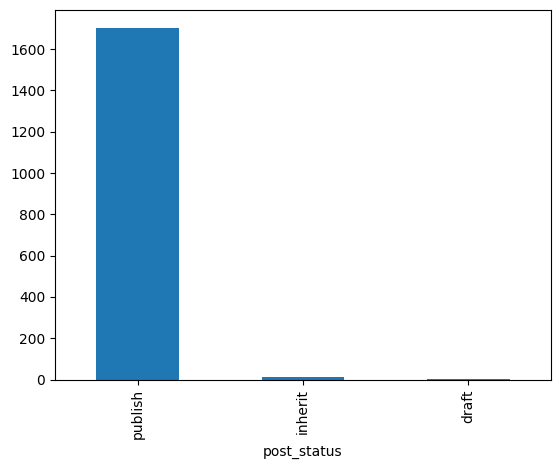

In [10]:
df['post_status'].value_counts().plot(kind='bar')

In [11]:
df[df['post_status'] == "inherit"][:3]["post_content"]

2690    <style>/*! elementor - v3.18.0 - 20-12-2023 */...
2691    <style>/*! elementor - v3.18.0 - 20-12-2023 */...
2692    <style>/*! elementor - v3.18.0 - 20-12-2023 */...
Name: post_content, dtype: object

In [12]:
html = df['post_content'][1000]
# remove &nbsp;
html = html.replace('&nbsp;', ' ')
# split html content into sections
sections = html.split('<h4>')
print(html)
print(sections[2])



<style>
h1 {<br />
  padding: 100px;<br />
}<br />
a {<br />
  color: #7B2222;<br />
  text-decoration: none; /* no underline */<br />
}<br />
a:hover {<br />
  text-decoration: none; /* no underline */<br />
  color: #7B2222;<br />
}<br />
div.respButton {<br />
  float: left;<br />
  width: 9%;<br />
  padding: 5px 0px 25px 4%;<br />
}<br />
@media only screen and (max-width: 500px) {<br />
  div.responsive2 {<br />
    width: 9%;<br />
    padding: 5px 0px 10px 4%;<br />
  }<br />
}<br />
div.button {<br />
  background-color: #D6D6D6;<br />
  border-radius: 13px;<br />
  color: white;<br />
  padding: 5px 10px;<br />
  text-align: center;<br />
  text-decoration: none;<br />
  display: inline-block;<br />
  font-size: 12px;<br />
  width: 100%;<br />
}<br />
div.button:hover {<br />
  -webkit-box-shadow: 0px 0px 3px 0px rgba(123,123,123,1);<br />
  -moz-box-shadow: 0px 0px 3px 0px rgba(123,123,123,1);<br />
  box-shadow: 0px 0px 3px 0px #7B7B7B;<br />
  font-weight: bold;<br />
  c

<Axes: xlabel='has_h'>

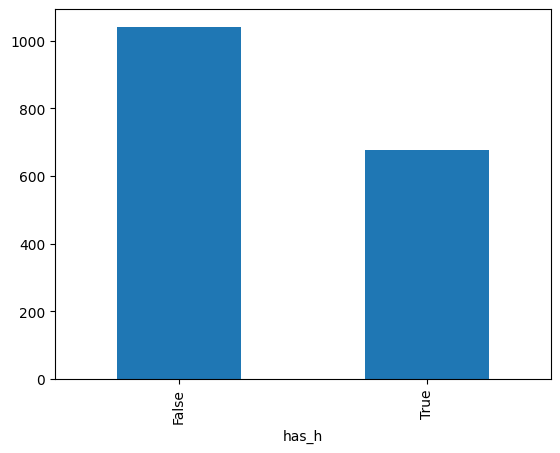

In [13]:
html = df['post_content']
# check if contains 'h'
df['has_h'] = html.str.contains('<h')
df['has_h'].value_counts().plot(kind='bar')


<Axes: xlabel='author'>

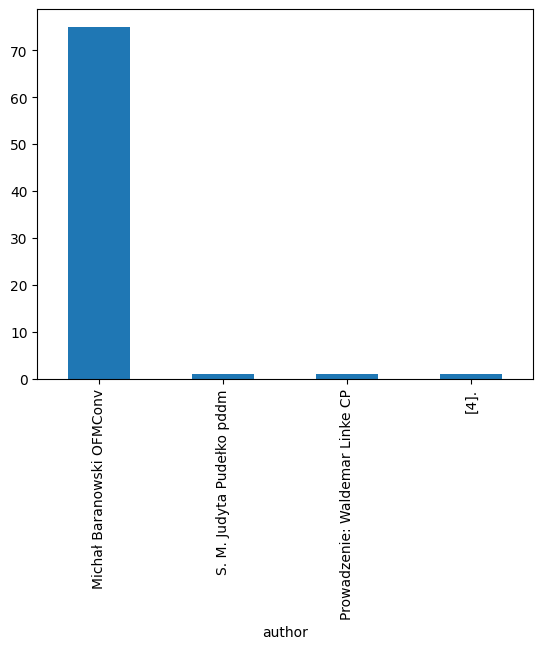

In [18]:
comments_df = df[df['has_h'] == True]
df["zapraszamy"] = df['post_content'].str.contains("Zapraszamy")
comments_df = comments_df[comments_df["zapraszamy"] == False]
# df["zapraszamy"].value_counts().plot(kind='bar')
# filtered_df['post_content'].values[3]
pattern = r'<p.*right[^>]*>(.+?)</p>'
comments_df['author'] = comments_df['post_content'].str.extract(pattern, expand=False)
# replace author string with formatted value
comments_df['author'] = comments_df['author'].str.replace('<.*?>', '',regex=True)
comments_df['author'] = comments_df['author'].str.replace('o. ', '')
# filter not null comments_df['author']
# comments_df = comments_df[comments_df['author'].notnull()]
comments_df['author'].value_counts().plot(kind='bar')

# zero shot encoding event or bible


In [35]:
# filter comments_df["author"] is not set
no_author = comments_df[comments_df["author"].isnull()]
no_author['post_content'].values[88]

# oracle(
#     no_author['post_content'].values[88],
#     candidate_labels=["biblia", "event"],
# )
text_to_summarize = no_author['post_content'].values[88]
prompt = f"Czy text zawiera komentarz do biblii:\n\n{text_to_summarize}\n\nOdpowiedz:"
pipe(prompt, do_sample=False, max_new_tokens=50)

KeyboardInterrupt: 